# Prepare Data, Model, Agent

# imports and setup

In [1]:
# The following is needed in Jupyter labs for listing methods;

# use dot then tab after object
%config Completer.use_jedi = False

### use tensorboard

In [2]:
try:
    import tensorboard
except:
    import pip
    pip.main(['install', 'tensorboard'])
    import tensorboard

In [3]:
%load_ext tensorboard

In [1]:
import os
import time
import numpy as np
import pandas as pd
from pprint import pprint
%matplotlib inline
from pylab import plt, mpl
import pickle
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

import datetime as datetime
from datetime import date

D:\DProgramFiles\Anaconda3\envs\KM-Trading\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\DProgramFiles\Anaconda3\envs\KM-Trading\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\DProgramFiles\Anaconda3\envs\KM-Trading\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# import tensorflow as tf

In [7]:
# tf.__version__

In [8]:
# from tensorflow import keras
# from tensorflow.keras import layers

# Set up Features from columns

In [8]:
features =[
    'o',
     'h',
     'l',
     'c',
     'volume',
     'r',
     'sma',
     'min',
     'max',
     'mom',
     'std',
     'd',
     'o_lag_1',
     'o_lag_2',
     'o_lag_3',
     'o_lag_4',
     'o_lag_5',
     'h_lag_1',
     'h_lag_2',
     'h_lag_3',
     'h_lag_4',
     'h_lag_5',
     'l_lag_1',
     'l_lag_2',
     'l_lag_3',
     'l_lag_4',
     'l_lag_5',
     'c_lag_1',
     'c_lag_2',
     'c_lag_3',
     'c_lag_4',
     'c_lag_5',
     'volume_lag_1',
     'volume_lag_2',
     'volume_lag_3',
     'volume_lag_4',
     'volume_lag_5',
     'r_lag_1',
     'r_lag_2',
     'r_lag_3',
     'r_lag_4',
     'r_lag_5',
     'sma_lag_1',
     'sma_lag_2',
     'sma_lag_3',
     'sma_lag_4',
     'sma_lag_5',
     'min_lag_1',
     'min_lag_2',
     'min_lag_3',
     'min_lag_4',
     'min_lag_5',
     'max_lag_1',
     'max_lag_2',
     'max_lag_3',
     'max_lag_4',
     'max_lag_5',
     'mom_lag_1',
     'mom_lag_2',
     'mom_lag_3',
     'mom_lag_4',
     'mom_lag_5',
     'std_lag_1',
     'std_lag_2',
     'std_lag_3',
     'std_lag_4',
     'std_lag_5',
     'd_lag_1',
     'd_lag_2',
     'd_lag_3',
     'd_lag_4',
     'd_lag_5'
]

In [9]:
len(features)

72

# Set up learning, validation and testing datasets
based on dates

In [10]:
import datetime
import pytz

get saved features

In [11]:
len(features)

72

In [12]:
## set up Learning environment dates
startLearningDate =datetime.datetime(2021, 1, 1,0,0,0)
lastDayInData =datetime.datetime(2021, 10, 1,0,0,0)
lastDayInData = lastDayInData.combine(lastDayInData, lastDayInData.min.time())
# endLearningDate = startLearningDate + datetime.timedelta(days = 30)
endLearningDate = startLearningDate + datetime.timedelta(days = 3)

print('startLearningDate: ', startLearningDate)
print('endLearningDate: ', endLearningDate)
    
    
### set up validation environment dates
startValDate = endLearningDate + datetime.timedelta(1)
print('startValDate', startValDate)
# endValDate = startValDate + datetime.timedelta(10)
endValDate = startValDate + datetime.timedelta(1)

print('endValDate', endValDate)

### set up test environment dates
startTestDate = endValDate + datetime.timedelta(1)
print('startTestDate: ', startTestDate)
# endTestDate = startTestDate + datetime.timedelta(10)
endTestDate = startTestDate + datetime.timedelta(1)

print('endTestDate: ', endTestDate)

### set up environment start and end counts when using number index
# startLearningDate = 0
# startLearningDate = 0
# endLearningDate = int(data.shape[0] *.800000)
# etc.


startLearningDate:  2021-01-01 00:00:00
endLearningDate:  2021-01-04 00:00:00
startValDate 2021-01-05 00:00:00
endValDate 2021-01-06 00:00:00
startTestDate:  2021-01-07 00:00:00
endTestDate:  2021-01-08 00:00:00


In [13]:
symbol = 'USD_JPY'
window = 5
lags = 5
rows = 1
granularity = 'M1'
price = 'A'
leverage = 30
min_accuracy=0.10,
min_performance=0.85


In [14]:
try:
    import v20
except:
    import pip
    pip.main(['install', 'v20'])
    import V20

In [15]:
try:
    import tensorflow
except:
    import pip
    pip.main(['install', 'tensorflow'])
    import tensorflow

In [16]:

try:
    import pyvirtualdisplay
except:
    import pip
    pip.main(['install', 'pyvirtualdisplay'])
    import pyvirtualdisplay


In [17]:
import modelBuilderEnv as mbe

In [ ]:
mu = 

In [18]:
# from importlib import reload
# reload(mbe)
# import modelBuilderEnv as mbe

In [19]:
learn_env = mbe.ModelBuilderEnv(
    symbol=symbol,
    start = startLearningDate,
    end = endLearningDate,
    granularity= granularity,
    price= price,
    features=features,
    window=window,
    lags=lags,
    rows = rows,
    leverage=leverage,
    min_accuracy= min_accuracy,
    min_performance=min_performance,
)

HISTORICAL DATA WAS COLLECTED


In [20]:
learn_env.observation_space.shape

(1,)

In [21]:
learn_env.action_space.n

2

In [22]:
a = learn_env.action_space.sample()
a

0

In [23]:
# state, reward, done, info = learn_env.step(a)

In [24]:
learn_env.window

5

In [25]:
# learn_env.data.info()

In [26]:
np.bincount(learn_env.data['d'])

array([33, 27], dtype=int64)

In [27]:
#                   start=f'{date} 13:00:00',
#                   end=f'{date} 14:00:00',
# the minimum accuracy and performance are set to zero
# since we are not training, but instead evaluating.

valid_env = mbe.ModelBuilderEnv(
    symbol=learn_env.symbol,
    start = startValDate,
    end = endValDate,
    granularity=learn_env.granularity,
    price=learn_env.price,
    features=learn_env.features,
    window=learn_env.window,
    lags=learn_env.lags,
    rows = learn_env.rows,
    leverage=learn_env.leverage,
    min_accuracy=0,
    min_performance=0,
    mu=learn_env.mu,
    std=learn_env.std
    )

HISTORICAL DATA WAS COLLECTED


In [28]:
# valid_env.data.info()

In [29]:
#                   start=f'{date} 14:00:00',
#                   end=f'{date} 17:00:00',
#     start = f'{startTestDate} 08:00:00+00:00',
#     end = f'{endTestDate} 13:00:00+00:00',
test_env = mbe.ModelBuilderEnv(
    symbol=learn_env.symbol,
    start = startTestDate,
    end = endTestDate,
    granularity=learn_env.granularity,
    price=learn_env.price,
    features=learn_env.features,
    window=learn_env.window,
    lags=learn_env.lags,
    leverage=learn_env.leverage,
    rows = learn_env.rows,
    min_accuracy=0,
    min_performance=0,
    mu=learn_env.mu,
    std=learn_env.std
    )

HISTORICAL DATA WAS COLLECTED


In [30]:
# test_env.data.info()

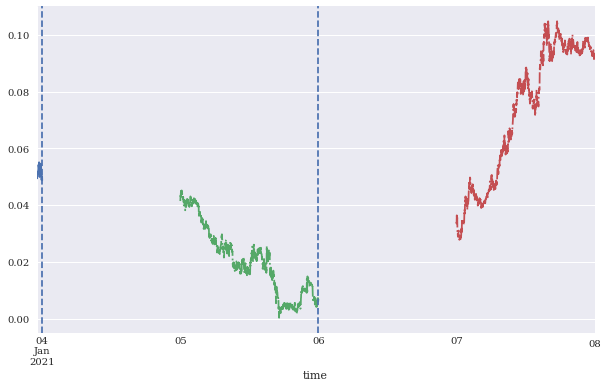

In [31]:
# plots the closing prices for learn env and testing data
ax = learn_env.data['c'].plot(figsize=(10, 6))
plt.axvline(learn_env.data.index[-1], ls='--')
valid_env.data['c'].plot(ax=ax, style='-.')
plt.axvline(valid_env.data.index[-1], ls='--')
test_env.data['c'].plot(ax=ax, style='-.');

## TO DO: Does the closing prices show that prices almost always drop in the latter part of the week?

In [32]:
# import kmV20

# ***** START create the model

In [33]:
import tradingbot

In [34]:
from importlib import reload
reload(tradingbot)
import tradingbot as tradingbot

In [35]:
# import modelBuilderEnv as mbe

In [36]:
# from importlib import reload
# reload(mbe)
# import modelBuilderEnv as mbe

In [37]:
print(learn_env.action_space.n)

2


In [38]:
tradingbot.set_seeds(100)
agent = tradingbot.TradingBot(learn_env = learn_env, valid_env = valid_env)

w0  0.9090909090909092
w1  1.1111111111111112
self.classWeights:  {0: 0.9090909090909092, 1: 1.1111111111111112}
1- self.replayCounter:  0
Num GPUs: 1


In [39]:
# otb = OandaTradingBot('accountConfigs.cfg', agent, '1M',
#                       1500, verbose=False)

In [40]:
episodes = 20
# episodes = 3

In [41]:
# print(agent.arrayBalanceOfTrades)

In [42]:
print(sum(agent.trewards))

0


In [43]:
agent.classWeights

{0: 0.9090909090909092, 1: 1.1111111111111112}

In [44]:
%time agent.learn(episodes)

_____________________________________________
START EPISODE 1 of 20
episode start time:  Saturday, March 19, 2022 09:17:44
END OF EPISODE 1 of 20
episode end time:  Saturday, March 19, 2022 09:17:44
episode time duration:  0:00:00.164002
End 1/20 episodes at Saturday, March 19, 2022 09:17:44 for a total of 0:00:00.164002 with the following balance of trades -0.8334202363595751 
_____________________________________________
epmod:  1
episodes:  20
True
False
False
_____________________________________________
START EPISODE 2 of 20
episode start time:  Saturday, March 19, 2022 09:17:54
END OF EPISODE 2 of 20
episode end time:  Saturday, March 19, 2022 09:17:54
episode time duration:  0:00:00.132992
End 2/20 episodes at Saturday, March 19, 2022 09:17:54 for a total of 0:00:00.132992 with the following balance of trades -2.0793604905544396 
_____________________________________________
epmod:  2
episodes:  20
False
False
False
_____________________________________________
START EPISODE 3 o

In [45]:
print(f'length of arrayBalanceOfTrades: {len(agent.arrayBalanceOfTrades)}')

length of arrayBalanceOfTrades: 85


<function matplotlib.pyplot.show(close=None, block=None)>

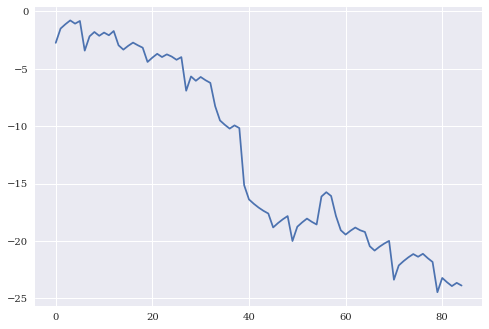

In [46]:
plt.plot(agent.arrayBalanceOfTrades)
plt.show

In [47]:
print('average of arrayBalanceOfTrades: ', sum(agent.arrayBalanceOfTrades)/len(agent.arrayBalanceOfTrades))

average of arrayBalanceOfTrades:  -12.637086296451265


In [48]:
print('sum of arrayBalanceOfTrades: ', sum(agent.arrayBalanceOfTrades))

sum of arrayBalanceOfTrades:  -1074.1523351983576


In [49]:
# pl

In [50]:
# pl.cumsum()
print('sum: ', sum(agent.arrayBalanceOfTrades))


sum:  -1074.1523351983576


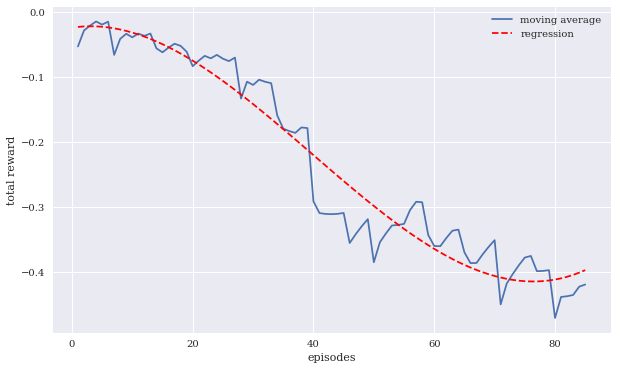

In [51]:
agent.plot_totalReward()

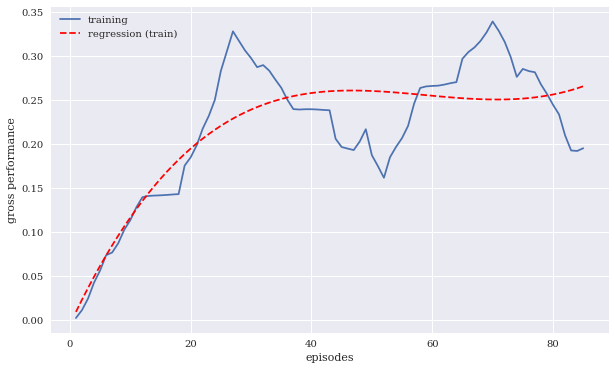

In [52]:
agent.a_plot_performance()

In [53]:
agent.arrayBalanceOfTrades

[-2.7398731268871357,
 -1.4964104075551479,
 -1.1178564887790097,
 -0.7863614031812245,
 -1.0676134631449141,
 -0.8334202363595751,
 -3.416940876243131,
 -2.173478156911143,
 -1.7949242381350048,
 -2.12641932373279,
 -1.8451672637691006,
 -2.0793604905544396,
 -1.7097260339976772,
 -2.9531887533296652,
 -3.331742672105803,
 -3.000247586508018,
 -2.718995526544328,
 -2.953188753329667,
 -3.1623866818836524,
 -4.40584940121564,
 -4.027295482439502,
 -3.695800396841717,
 -3.977052456805407,
 -3.742859230020068,
 -3.934080738001904,
 -4.215332797965593,
 -3.981139571180254,
 -6.909339065603337,
 -5.665876346271349,
 -6.044430265047487,
 -5.712935179449702,
 -5.9941872394133915,
 -6.228380466198731,
 -8.256691503909051,
 -9.50015422324104,
 -9.878708142017178,
 -10.210203227614963,
 -9.928951167651274,
 -10.163144394436612,
 -15.135489794026752,
 -16.37895251335874,
 -16.75750643213488,
 -17.089001517732665,
 -17.370253577696356,
 -17.604446804481697,
 -18.817792109710435,
 -18.439238190934

In [2]:
pklFile = 'addedFeaturesToNormalized_USD_JPY_2021-01-01_to_2021-12-31_M1_A.pkl'

In [4]:
dfpkl = pd.read_pickle(pklFile)

In [5]:
dfpkl.head()

,o,h,l,c,volume,r,sma,min,max,mom,...,std_lag_1,std_lag_2,std_lag_3,std_lag_4,std_lag_5,d_lag_1,d_lag_2,d_lag_3,d_lag_4,d_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2021-01-03 23:01:00,0.05139,0.05093,0.04971,0.04954,0.38009,-0.03536,0.05162,0.04954,0.05412,-0.00116,...,0.02069,0.02049,0.02135,0.02087,0.03007,1.00000,1.00000,0.00000,0.00000,0.00000
2021-01-03 23:02:00,0.04991,0.04946,0.05018,0.04978,0.19790,0.00468,0.05160,0.04954,0.05412,-0.00031,...,0.02209,0.02069,0.02049,0.02135,0.02087,0.00000,1.00000,1.00000,0.00000,0.00000
2021-01-03 23:03:00,0.04976,0.05054,0.05010,0.05063,0.38009,0.01699,0.05160,0.04954,0.05412,0.00000,...,0.02197,0.02209,0.02069,0.02049,0.02135,1.00000,0.00000,1.00000,1.00000,0.00000
2021-01-03 23:04:00,0.05069,0.05039,0.05064,0.05009,0.37437,-0.01078,0.05161,0.04954,0.05412,0.00008,...,0.02218,0.02197,0.02209,0.02069,0.02049,1.00000,1.00000,0.00000,1.00000,1.00000
2021-01-03 23:05:00,0.04999,0.05039,0.05049,0.05032,0.32451,0.00463,0.05159,0.04954,0.05412,-0.00038,...,0.02213,0.02218,0.02197,0.02209,0.02069,0.00000,1.00000,1.00000,0.00000,1.00000
